### Implementing simple Chatbot Using LangGraph

In [1]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [4]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--d87be8c8-cdcf-4feb-9901-5da3a06c93ab-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [5]:
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model="qwen-qwq-32b")
llm_groq.invoke("Hey I am Krish and i like to play cricket")

AIMessage(content="\n<think>\nOkay, the user is Krish who likes to play cricket. I should respond warmly, maybe mention some cricket talk. Let me think of a friendly reply. Maybe ask about his favorite player or team? Also, since he mentioned liking cricket, perhaps suggest discussing matches or tips. Keep it casual and engaging. Let me make sure the tone is positive and encouraging. Maybe start with a greeting, acknowledge his interest, and then invite him to share more. Yeah, that should work.\n\nWait, should I mention any recent cricket events? Like the World Cup or IPL? But I don't know his location or when he's writing. Maybe better to keep it general. Avoid assuming too much. Just a friendly opener. Alright, let's draft the response.\n</think>\n\nHey Krish, nice to meet you! Cricket is such a thrilling game—love the enthusiasm! Do you have a favorite team or player? Also, are you into batting, bowling, or fielding the most? Let me know—I’d love to chat about tactics, recent match

### We Will start With Creating Nodes

In [6]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

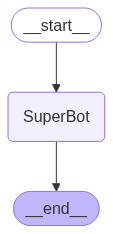

In [7]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile(checkpointer=memory)


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [8]:
## Invocation

config = {"configurable": {"thread_id": "1"}}

graph_builder.invoke({'messages':"Hi,My name is Krish And I like cricket"},config)

{'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='47f4ef14-16b4-427d-90a9-1a04838c2920'),
  AIMessage(content="\n<think>\nOkay, the user is Krish, and he mentioned liking cricket. I should respond in a friendly manner. Let me start by greeting him back and acknowledging his name and interest. Maybe ask how long he's been into cricket. That should keep the conversation going. I should keep it casual and open-ended so he feels comfortable sharing more. Let me check if there's anything else needed. Hmm, maybe mention some popular cricket topics like favorite teams or players? But maybe not too much at once. Just a simple question first.\n</think>\n\nHi Krish! Nice to meet you! Cricket is a fantastic sport—do you follow any particular teams or players? Also, have you ever tried playing cricket yourself? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 143, 'prompt_tokens': 20, 'total

### Streaming 
Methods: .stream() and astream()

- These methods are sync and async methods for streaming back results.

Additional parameters in streaming modes for graph state

- **values** : This streams the full state of the graph after each node is called.
- **updates** : This streams updates to the state of the graph after each node is called.



#### Streaming The Responses With Stream Method

In [9]:
# Create a thread
config = {"configurable": {"thread_id": "3"}}

for chunk in graph_builder.stream({'messages':"Hi,My name is Krish And I like cricket"},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="\n<think>\nOkay, the user introduced themselves as Krish and mentioned they like cricket. I should respond warmly and maybe ask about their favorite cricketer or team to keep the conversation going. I should keep it friendly and open-ended to encourage them to share more. Let me make sure to use proper grammar and a friendly tone.\n</think>\n\nHello Krish! That's great that you like cricket—it's a fantastic sport. Do you have a favorite cricketer or team? Feel free to share anything else you'd like! 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 105, 'prompt_tokens': 20, 'total_tokens': 125, 'completion_time': 0.241444291, 'prompt_time': 0.003140966, 'queue_time': 0.211276491, 'total_time': 0.244585257}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_ea798e78f0', 'finish_reason': 'stop', 'logprobs': None}, id='run--624d445e-9a1d-4946-8769-0902729faa34-0', usage_metadata={'input_tokens': 20, 'outpu

In [10]:
for chunk in graph_builder.stream({'messages':"I also like football"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='17de97e6-7ba7-4575-beba-0976ddbb6b2f'), AIMessage(content="\n<think>\nOkay, the user introduced themselves as Krish and mentioned they like cricket. I should respond warmly and maybe ask about their favorite cricketer or team to keep the conversation going. I should keep it friendly and open-ended to encourage them to share more. Let me make sure to use proper grammar and a friendly tone.\n</think>\n\nHello Krish! That's great that you like cricket—it's a fantastic sport. Do you have a favorite cricketer or team? Feel free to share anything else you'd like! 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 105, 'prompt_tokens': 20, 'total_tokens': 125, 'completion_time': 0.241444291, 'prompt_time': 0.003140966, 'queue_time': 0.211276491, 'total_time': 0.244585257}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_ea798e78f0'

In [11]:
for chunk in graph_builder.stream({'messages':"I also like football "},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content='\n<think>\nOkay, the user mentioned they like both cricket and football. In the first response, I asked about their favorite cricketer or team. Then they said they also like football, so I asked about their favorite team or player in football. Now they\'ve repeated "I also like football" again. Hmm, maybe they wanted to add more but the message got cut off? Or perhaps they\'re just emphasizing their interest again.\n\nWait, looking back, the user\'s third message is exactly the same as their second: "I also like football". Oh, but in the history, the assistant\'s second response was a bit longer, so maybe there was a repetition. The user might be trying to add more info but maybe the message was sent accidentally. Alternatively, they might be confirming their interest again. \n\nI should acknowledge their interest again, maybe ask more specific questions about football to get the conversation going. Since they mentioned both sports, maybe t

In [12]:
for chunk in graph_builder.stream({'messages':"I Love sports "},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Krish And I like cricket', additional_kwargs={}, response_metadata={}, id='17de97e6-7ba7-4575-beba-0976ddbb6b2f'), AIMessage(content="\n<think>\nOkay, the user introduced themselves as Krish and mentioned they like cricket. I should respond warmly and maybe ask about their favorite cricketer or team to keep the conversation going. I should keep it friendly and open-ended to encourage them to share more. Let me make sure to use proper grammar and a friendly tone.\n</think>\n\nHello Krish! That's great that you like cricket—it's a fantastic sport. Do you have a favorite cricketer or team? Feel free to share anything else you'd like! 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 105, 'prompt_tokens': 20, 'total_tokens': 125, 'completion_time': 0.241444291, 'prompt_time': 0.003140966, 'queue_time': 0.211276491, 'total_time': 0.244585257}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_ea798e78f0'

#### Streaming The Responses With astream Method

**Streaming tokens**
We often want to stream more than graph state.

In particular, with chat model calls it is common to stream the **tokens** as they are generated.

We can do this using the .astream_events method, which streams back events as they happen inside nodes!

Each event is a dict with a few keys:

- event: This is the type of event that is being emitted.
- name: This is the name of event.
- data: This is the data associated with the event.
- metadata: Containslanggraph_node, the node emitting the event.

In [13]:
config = {"configurable": {"thread_id": "3"}}

async for event in graph_builder.astream_events({"messages":["Hi My name is Krish and I like to play cricket"]},config,version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi My name is Krish and I like to play cricket']}}, 'name': 'LangGraph', 'tags': [], 'run_id': 'ee147f52-be04-423d-afb4-abf1287f036e', 'metadata': {'thread_id': '3'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi My name is Krish and I like to play cricket']}}, 'name': '__start__', 'tags': ['graph:step:12', 'langsmith:hidden', 'langsmith:hidden'], 'run_id': '9e486a10-1eec-4d6d-86fc-ff81ad636ecf', 'metadata': {'thread_id': '3', 'langgraph_step': 12, 'langgraph_node': '__start__', 'langgraph_triggers': ['__start__'], 'langgraph_path': ('__pregel_pull', '__start__'), 'langgraph_checkpoint_ns': '__start__:09740553-c5c0-5836-8719-d8aa337c4095'}, 'parent_ids': ['ee147f52-be04-423d-afb4-abf1287f036e']}
{'event': 'on_chain_end', 'data': {'output': {'messages': ['Hi My name is Krish and I like to play cricket']}, 'input': {'messages': ['Hi My name is Krish and I like to play cricket']}}, 'run_id': '